In [8]:
# import libraries
from ultralytics import YOLO
import yaml
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# Show classes
with open('/content/Vehicle_Detection/vehicles.yaml', 'r') as f:
    data = yaml.safe_load(f)
    print("Classes:", data['names'])

Classes: {0: 'Bus', 1: 'Truck', 2: 'Motorcycle', 3: 'Car'}


**In the vehicle detection dataset we have a collection of images containing various types of vehicles in different locations, positions, and lighting conditions, often mixed with other objects in the scene.
The main goal of the model is to detect these vehicles in the images and classify them into four distinct classes:
Buses , Trucks ,Cars ,Motorcycles**

****

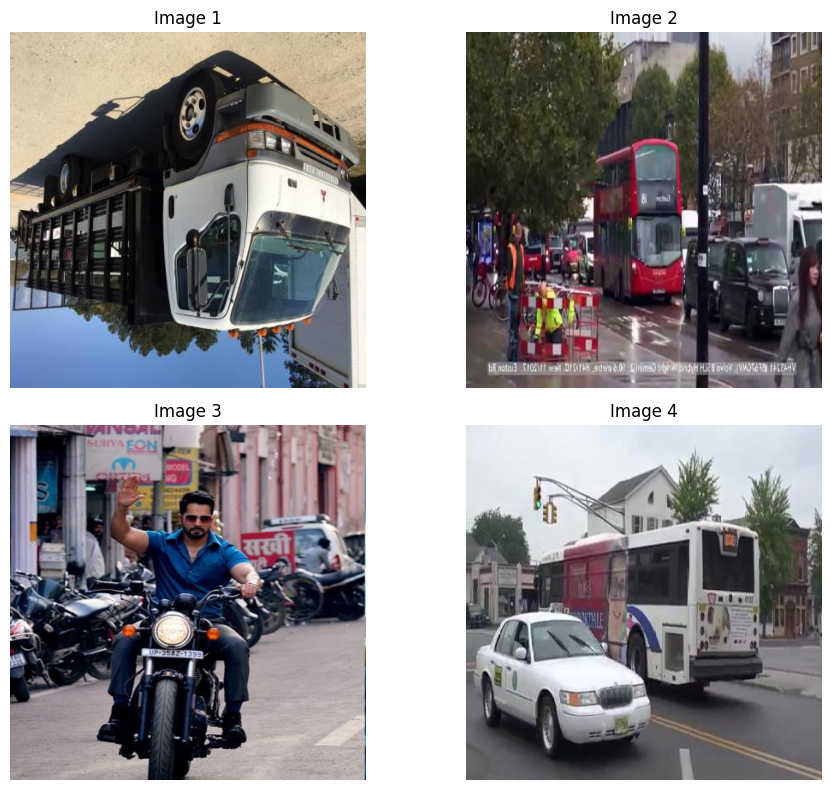

In [12]:
# Reading pictures
img1 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/train/images/img_5466_jpg.rf.05681209bdb9a1a30819fd11169a2780.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/train/images/img00032_jpg.rf.b5e5fd40b977dea9fa6d37640f77fbcb.jpg'), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/train/images/new76_jpg.rf.99781bfbc36e7bbfa4eb93554abcadd0.jpg'), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/train/images/img00010_jpg.rf.102157a771bcff96da876960b9326bad.jpg'), cv2.COLOR_BGR2RGB)

# Create a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# View images
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title('Image 1')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Image 2')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Image 3')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Image 4')

plt.tight_layout()
plt.show()

In [13]:
# تحميل نموذج YOLOv8n
model = YOLO('yolov8n.yaml')


****

In [14]:
# Model training
model.train(
    data='/content/Vehicle_Detection/vehicles.yaml',
    epochs=50,
    imgsz=416,
    batch=16,
    name='vehicle-detection-yolov8n',
    project='/content/Vehicle_Detection/RaedIsmail_Models/train',
    patience=10,
    val=True,
    save=True,
    verbose=True
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Vehicle_Detection/vehicles.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=vehicle-detection-yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, 

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 91.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.1±10.8 MB/s, size: 44.7 KB)


train: Scanning /content/Vehicle_Detection/train/labels... 12000 images, 3 backgrounds, 0 corrupt: 100%|██████████| 12000/12000 [00:23<00:00, 513.48it/s]


train: New cache created: /content/Vehicle_Detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.3±9.7 MB/s, size: 51.8 KB)


val: Scanning /content/Vehicle_Detection/valid/labels... 2692 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2692/2692 [00:05<00:00, 500.82it/s]


val: New cache created: /content/Vehicle_Detection/valid/labels.cache
Plotting labels to /content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.908G      2.631      3.458      3.338         36        416: 100%|██████████| 750/750 [02:17<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:18<00:00,  4.63it/s]


                   all       2692       3172      0.431      0.298      0.158     0.0606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.13G      1.703      2.336      2.202         51        416: 100%|██████████| 750/750 [02:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.41it/s]


                   all       2692       3172      0.513      0.482       0.47      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.15G      1.471      1.849      1.972         46        416: 100%|██████████| 750/750 [02:09<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.45it/s]


                   all       2692       3172      0.651      0.554      0.615       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.17G      1.365      1.613      1.853         53        416: 100%|██████████| 750/750 [02:09<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:16<00:00,  5.26it/s]


                   all       2692       3172      0.695      0.603      0.666       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.19G      1.284      1.437      1.766         43        416: 100%|██████████| 750/750 [02:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.47it/s]


                   all       2692       3172      0.808      0.691      0.763      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.2G      1.234      1.324      1.714         40        416: 100%|██████████| 750/750 [02:09<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.49it/s]


                   all       2692       3172      0.874      0.697        0.8      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.22G      1.191       1.24       1.67         49        416: 100%|██████████| 750/750 [02:10<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.65it/s]

                   all       2692       3172      0.856      0.733      0.814      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.23G      1.141      1.172      1.629         47        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.59it/s]


                   all       2692       3172      0.854      0.722      0.812      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.25G      1.122      1.127      1.608         41        416: 100%|██████████| 750/750 [02:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.72it/s]

                   all       2692       3172      0.921      0.726      0.831      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.27G      1.101      1.076      1.583         45        416: 100%|██████████| 750/750 [02:08<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.70it/s]

                   all       2692       3172      0.898      0.772      0.852      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.29G      1.078      1.038      1.562         46        416: 100%|██████████| 750/750 [02:08<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.66it/s]

                   all       2692       3172       0.88      0.768      0.848      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.3G      1.049     0.9992      1.538         48        416: 100%|██████████| 750/750 [02:08<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.70it/s]

                   all       2692       3172      0.911      0.758      0.854      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.32G      1.042     0.9814      1.525         45        416: 100%|██████████| 750/750 [02:08<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.63it/s]

                   all       2692       3172      0.889      0.786      0.866      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.34G      1.018     0.9367      1.506         46        416: 100%|██████████| 750/750 [02:07<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.73it/s]

                   all       2692       3172      0.919      0.779      0.863      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.35G      1.006     0.9181      1.495         37        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.69it/s]

                   all       2692       3172      0.891      0.817      0.872       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.37G     0.9853     0.8941      1.474         36        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.35it/s]


                   all       2692       3172      0.903      0.789      0.863      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.39G     0.9771     0.8842      1.468         49        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.62it/s]

                   all       2692       3172      0.901      0.795      0.872      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.41G     0.9586     0.8567      1.454         43        416: 100%|██████████| 750/750 [02:07<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.72it/s]

                   all       2692       3172      0.923      0.806      0.878      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.42G     0.9505     0.8344      1.446         50        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.68it/s]

                   all       2692       3172      0.925      0.794      0.876      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.44G     0.9439     0.8279      1.443         48        416: 100%|██████████| 750/750 [02:09<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.39it/s]


                   all       2692       3172      0.924       0.79      0.877      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.46G     0.9352     0.8099      1.432         49        416: 100%|██████████| 750/750 [02:08<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.71it/s]

                   all       2692       3172      0.913      0.809       0.88      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.47G     0.9237     0.7994      1.425         36        416: 100%|██████████| 750/750 [02:06<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.73it/s]

                   all       2692       3172      0.928      0.799      0.874      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.49G     0.9139     0.7896      1.417         41        416: 100%|██████████| 750/750 [02:09<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.66it/s]

                   all       2692       3172      0.924      0.814      0.879      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.51G     0.9067      0.783      1.413         51        416: 100%|██████████| 750/750 [02:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.41it/s]


                   all       2692       3172       0.94      0.804      0.887      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.53G     0.8991     0.7691      1.403         45        416: 100%|██████████| 750/750 [02:09<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.67it/s]

                   all       2692       3172      0.912       0.82      0.881      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.54G     0.8908     0.7538        1.4         49        416: 100%|██████████| 750/750 [02:08<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.74it/s]

                   all       2692       3172      0.938      0.817      0.891      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.56G     0.8768      0.735      1.385         28        416: 100%|██████████| 750/750 [02:12<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.68it/s]

                   all       2692       3172      0.943      0.814      0.892      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.58G     0.8644     0.7241      1.375         44        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.74it/s]

                   all       2692       3172      0.944      0.808      0.887        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.59G     0.8668     0.7183      1.375         35        416: 100%|██████████| 750/750 [02:09<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.70it/s]

                   all       2692       3172      0.945       0.82       0.89      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.61G     0.8643     0.7151      1.374         37        416: 100%|██████████| 750/750 [02:10<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.53it/s]

                   all       2692       3172      0.943      0.817      0.893      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.63G     0.8479     0.6975      1.363         37        416: 100%|██████████| 750/750 [02:08<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.79it/s]

                   all       2692       3172      0.951      0.814      0.893      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.64G     0.8428      0.688      1.357         50        416: 100%|██████████| 750/750 [02:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.74it/s]

                   all       2692       3172      0.917      0.829      0.889      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.66G     0.8405     0.6735      1.352         47        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.73it/s]

                   all       2692       3172      0.927      0.825      0.889      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.68G      0.837      0.683      1.351         42        416: 100%|██████████| 750/750 [02:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.58it/s]


                   all       2692       3172      0.945      0.815      0.891      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.7G     0.8253     0.6627      1.343         41        416: 100%|██████████| 750/750 [02:09<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.74it/s]

                   all       2692       3172      0.935      0.817      0.891      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.71G     0.8167     0.6618      1.336         40        416: 100%|██████████| 750/750 [02:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.74it/s]

                   all       2692       3172      0.923      0.834      0.892      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.73G     0.8119     0.6472       1.33         31        416: 100%|██████████| 750/750 [02:10<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.68it/s]

                   all       2692       3172      0.937      0.827      0.893       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.75G     0.8081      0.647      1.327         36        416: 100%|██████████| 750/750 [02:14<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.66it/s]

                   all       2692       3172      0.946      0.815      0.892       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.76G     0.8026     0.6374      1.324         35        416: 100%|██████████| 750/750 [02:07<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.74it/s]

                   all       2692       3172      0.945      0.819      0.895      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.78G     0.7933     0.6311      1.317         45        416: 100%|██████████| 750/750 [02:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.69it/s]

                   all       2692       3172      0.937      0.824      0.893      0.724


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.8G     0.6544     0.4301      1.176         17        416: 100%|██████████| 750/750 [02:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.70it/s]

                   all       2692       3172      0.947      0.822      0.895      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.81G     0.6293     0.4045      1.154         25        416: 100%|██████████| 750/750 [02:05<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.60it/s]

                   all       2692       3172      0.933      0.835        0.9      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.83G     0.6216     0.3962       1.15         16        416: 100%|██████████| 750/750 [02:06<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.68it/s]

                   all       2692       3172      0.957      0.823      0.901      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.85G     0.6085     0.3851      1.137         20        416: 100%|██████████| 750/750 [02:04<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.72it/s]

                   all       2692       3172      0.957       0.82      0.902      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.87G     0.5957     0.3748       1.13         21        416: 100%|██████████| 750/750 [02:03<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.77it/s]

                   all       2692       3172      0.956      0.824      0.902      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.88G     0.5893     0.3681      1.124         19        416: 100%|██████████| 750/750 [02:03<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.73it/s]

                   all       2692       3172      0.956      0.824      0.901      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.9G     0.5779     0.3607      1.116         23        416: 100%|██████████| 750/750 [02:03<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.73it/s]

                   all       2692       3172      0.956      0.823      0.902       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.92G     0.5709     0.3524      1.112         17        416: 100%|██████████| 750/750 [02:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.60it/s]

                   all       2692       3172      0.958      0.821      0.903       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.93G     0.5672      0.349      1.107         17        416: 100%|██████████| 750/750 [02:03<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:14<00:00,  5.73it/s]

                   all       2692       3172      0.949      0.826      0.902      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.95G     0.5561     0.3438        1.1         18        416: 100%|██████████| 750/750 [02:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:15<00:00,  5.49it/s]


                   all       2692       3172      0.942      0.834      0.902       0.74

50 epochs completed in 1.996 hours.
Optimizer stripped from /content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n/weights/last.pt, 6.2MB
Optimizer stripped from /content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n/weights/best.pt, 6.2MB

Validating /content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:16<00:00,  5.08it/s]


                   all       2692       3172      0.959      0.821      0.903       0.74
                   Bus        597        853      0.922      0.703      0.829      0.637
                 Truck        796        810      0.983      0.985      0.994      0.889
            Motorcycle        625        666      0.945      0.932      0.967      0.706
                   Car        673        843      0.985      0.664      0.822      0.728
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ded4dc56390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

**Trains YOLOv8 on vehicle Detection dataset with 416x416 images, 50 epochs, batch size 16, and early stopping.


In [15]:
from google.colab import files
files.download('/content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
infer=YOLO("/content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n/weights/best.pt")

In [17]:
# model evaluation
metrics = infer.val(
    data='/content/Vehicle_Detection/vehicles.yaml',
    split='test',
    save_json=True,
    project='eval_results',
    name='test_eval',
    exist_ok=True
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.1±6.5 MB/s, size: 23.7 KB)


val: Scanning /content/Vehicle_Detection/test/labels... 1141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1141/1141 [00:02<00:00, 545.63it/s]

val: New cache created: /content/Vehicle_Detection/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:09<00:00,  7.88it/s]


                   all       1141       1351      0.944      0.845      0.907      0.755
                   Bus        317        438      0.879      0.747       0.82       0.63
                 Truck        398        412      0.953       0.99      0.993       0.89
            Motorcycle         88         96      0.959      0.975      0.983      0.754
                   Car        338        405      0.985      0.665       0.83      0.748
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Saving eval_results/test_eval/predictions.json...
Results saved to eval_results/test_eval


In [21]:
print("mAP@0.5:", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)


mAP@0.5: 0.9065242822345643
mAP@0.5:0.95: 0.7551817782048171


In [19]:
results = model.predict(
    source='/content/Vehicle_Detection/test/images',
    save=True,
    save_txt=True,
    imgsz=416
)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1141 /content/Vehicle_Detection/test/images/-------------------------------------------------------------------_Moment-15-_jpg.rf.2c77b7be0e7071e1dc2e279afd498227.jpg: 416x416 1 Bus, 1 Motorcycle, 8.8ms
image 2/1141 /content/Vehicle_Detection/test/images/-------------------------------------------------------------------_Moment-32-_jpg.rf.a811d0ae2e3a483b19f3037ab0e3c9fd.jpg: 416x416 1 Bus, 6.8ms
image 3/1141 /content/Vehicle_Detection/test/ima

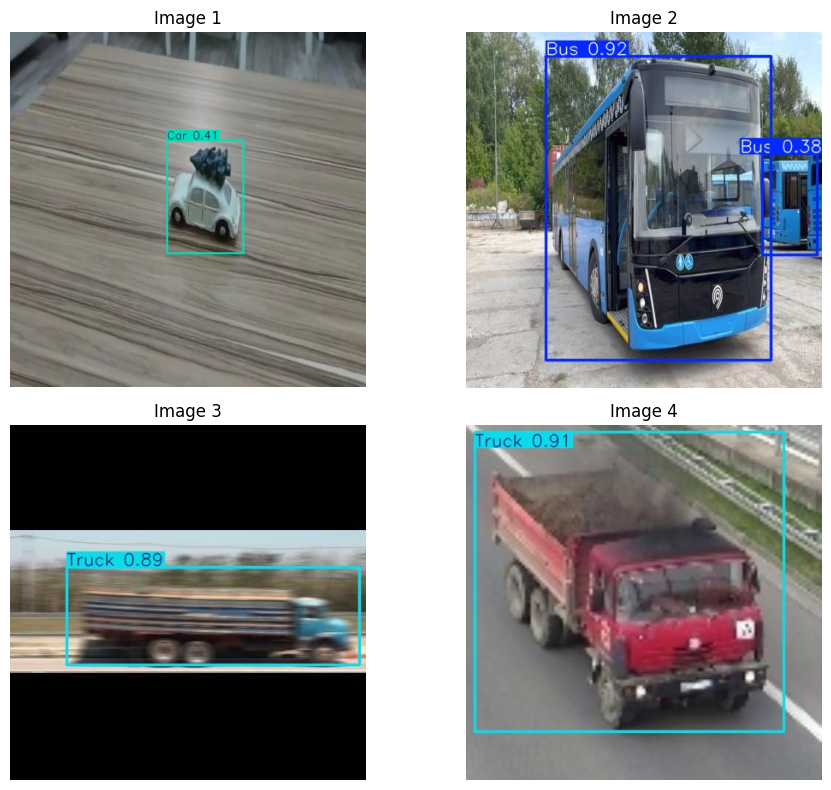

In [23]:
# Reading pictures
img1 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n2/WhatsApp-Video-2022-11-29-at-20_15_43_mp4-7_jpg.rf.c6df7fadeac673f2dc2e7d7ce497ffd9.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n2/------_png_jpg.rf.378efe302236d89f29b5166531da40f7.jpg'), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n2/20160927110318-550_color-ROI-1-85_jpg.rf.2272251e015d38e29eed9dc0dee2efcc.jpg'), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread('/content/Vehicle_Detection/RaedIsmail_Models/train/vehicle-detection-yolov8n2/Image_013312_jpg.rf.3a9269c7719c3f633c08c5104272df99.jpg'), cv2.COLOR_BGR2RGB)

# Create a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# View images
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
axs[0, 0].set_title('Image 1')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Image 2')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Image 3')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Image 4')

plt.tight_layout()
plt.show()